# Ex2: Logistic Regression
 Load Data
 The first two columns contains the exam scores and the third column
 contains the label.

In [1]:
from pathlib import *
%run ../cs229config.py
exppath = str(PurePath(cs229basepath(),'machine-learning-ex2','ex2'))
print("CS229:"+exppath)

CS229:/media/curie/Windows7_OS/data/网络资源-吴恩达机器学习课程/编程作业/machine-learning-ex2/ex2


In [2]:
import pandas as pd
data = pd.read_csv(PurePath(exppath,'ex2data1.txt'),header=None)
X = data.iloc[:,[0,1]]
y = data.iloc[:,[2]]
print("data shape: ",data.shape,",X shape: ",X.shape,",y shape:",y.shape)

data shape:  (100, 3) ,X shape:  (100, 2) ,y shape: (100, 1)


## ==================== Part 1: Plotting ====================
  We start the exercise by first plotting the data to understand the 
  the problem we are working with.

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.
Program paused. Press enter to continue.


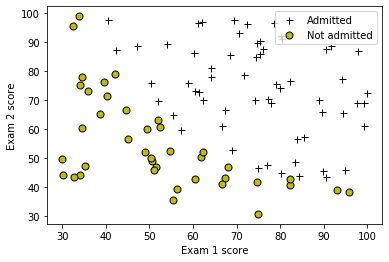

In [3]:
%matplotlib inline
#  We start the exercise by first plotting the data to understand the 
#  the problem we are working with.
print("Plotting data with + indicating (y = 1) examples and o \
indicating (y = 0) examples.")
import matplotlib.pyplot as plt
#PLOTDATA Plots the data points X and y into a new figure 
#   PLOTDATA(x,y) plots the data points with + for the positive examples
#   and o for the negative examples. X is assumed to be a Mx2 matrix.
# %run plotData
from plotData import plotData # cs229
plotData(X, y)
# Put some labels 
# Labels and Legend
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
# Specified in plot order
plt.legend(['Admitted', 'Not admitted'],loc=1)
print('Program paused. Press enter to continue.')

## ============ Part 2: Compute Cost and Gradient ============
  In this part of the exercise, you will implement the cost and gradient
  for logistic regression. You neeed to complete the code in 
  costFunction.py

In [4]:
#  Setup the data matrix appropriately, and add ones for the intercept term
X = data.iloc[:,[0,1]]
[m,n] = X.shape # now n = 2
# Add intercept term to x and X_test
import numpy as np
X = np.column_stack((np.ones(m),X)) # Add a column of ones to x
# Initialize fitting parameters
initial_theta = np.zeros(((n+1),1))
print("m =",m,",n =",n,",X shape:",X.shape,",initial_theta shape:",initial_theta.shape) 
# Expect m=100,n=2,X shape (100,3),initial_theta shape (3,1)
print("theta.T shape: ",initial_theta.T.shape,", X shape: ",X.shape," y shpae:",y.shape)
print("Shape of  X.dot(theta) :",(X.dot(initial_theta)).shape)
# 错误print("Shape of  theta^T * X :",(initial_theta.T * X).shape)

m = 100 ,n = 2 ,X shape: (100, 3) ,initial_theta shape: (3, 1)
theta.T shape:  (1, 3) , X shape:  (100, 3)  y shpae: (100, 1)
Shape of  X.dot(theta) : (100, 1)


%%latex

the regularized cost function in logistic regression is
\begin{align}
J(\theta)=\frac{1}{m}\sum_{i=1}^m[-y^{i}\log(h_\theta(x^{(i)})-(1-y^{(i)})\log(1-h_\theta(x^{(i)}))]+\frac{\lambda}{2m}\sum_{j=0}^n
{\theta}_j^2
\end{align}
The gradient of the cost function is a vector where the jth element is defined as follows:
\begin{align}
\frac{{\partial J(\theta)}}{\partial \theta_0} = \frac{1}{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}  \qquad for \quad j=0
\end{align}

In [5]:
X = np.column_stack((np.ones(m),data.iloc[:,[0,1]]))
# import math
import numpy as np
# z = initial_theta.T * X
def sigmoid(z):
    # g = np.zeros(z.shape) # g = 1/(1+math.e**(-z))
    return np.true_divide(1, 1 + np.exp(-z))
# sigmoid(initial_theta.T*X)
def getcolumn_stack_N(y,N):
    c_N = y
    for i in range(N-1):
        c_N = np.column_stack((c_N,y))
    return c_N
# ((h_x - np.column_stack((y,y,y))) *X).mean(axis=0)
def costFunction(theta, X, y):
    pos = y.iloc[:,0]>0 # convert dataframe y to series
    neg = y.iloc[:,0]<=0 # convert dataframe y to series
    # XXX h_x = sigmoid(theta.T*X)错了，应该用X.dot(theta)
    h_x = sigmoid(X.dot(theta))
    cost = -np.average(np.array(pos).reshape(y.shape) * np.log(h_x) + np.array(neg).reshape(y.shape) * np.log(1-h_x))
    n_y = getcolumn_stack_N(y,theta.shape[0])
    grad = ((h_x - n_y) * X).mean(axis=0).reshape(-1,1)
    return cost,grad
cost,grad = costFunction(initial_theta,X,y)

In [6]:
print('Cost at initial theta (zeros): {cost:.3f}\n'.format(cost=cost))
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros): ')
print(' {grad0:.4f} \n {grad1:.4f} \n {grad2:.4f}\n'.format(grad0=grad[0][0],grad1=grad[1][0],grad2=grad[2][0]))
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628')

Cost at initial theta (zeros): 0.693

Expected cost (approx): 0.693

Gradient at initial theta (zeros): 
 -0.1000 
 -12.0092 
 -11.2628

Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


In [44]:
test_theta = np.array([-24, 0.2, 0.2]).reshape(-1,1)
X = np.column_stack((np.ones(m),data.iloc[:,[0,1]]))
cost,grad = costFunction(test_theta,X,y)
print('Cost at test theta: {cost:.3f}\n'.format(cost=cost))
print('Expected cost (approx): 0.218\n')
print('Gradient at test theta: ')
print(' {grad0:.3f} \n {grad1:.3f} \n {grad2:.3f}\n'.format(grad0=grad[0][0],grad1=grad[1][0],grad2=grad[2][0]))
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n')

Cost at test theta: 0.218

Expected cost (approx): 0.218

Gradient at test theta: 
 0.043 
 2.566 
 2.647

Expected gradients (approx):
 0.043
 2.566
 2.647



## ============= Part 3: Optimizing using fminunc  =============
  In this exercise, you will use a built-in function (fminunc) to find the
  optimal parameters theta.

%%latex

\begin{align}
\frac{{\partial J(\theta)}}{\partial \theta_0} = \frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}  \qquad for \quad j=0
\end{align}

In [7]:
# https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
# data shape:  (100, 3) ,X shape:  (100, 2) ,y shape: (100, 1)
from scipy.optimize import minimize
# np.info(minimize)
# minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None,
#           bounds=None, constraints=(), tol=None, callback=None, options=None)
X = np.column_stack((np.ones(m),data.iloc[:,[0,1]]))
def costFunctionWrapper(theta_arr,X,y):
    theta = theta_arr.reshape(len(theta_arr),1)
    cost,grad = costFunction(theta,X,y)
    return cost
def gradFunctionWrapper(theta_arr,X,y):
    theta = theta_arr.reshape(len(theta_arr),1)
    cost,grad = costFunction(theta,X,y)
    return grad.reshape(-1)
# minimize(fun=costFunctionWrapper,x0=np.zeros(3),args=(X,y),method='TNC', jac=gradFunctionWrapper)
minimize(fun=costFunctionWrapper,x0=initial_theta.reshape(-1), \
    args=(X,y),method='TNC', jac=gradFunctionWrapper)

     fun: 0.20349770158947464
     jac: array([9.22700148e-09, 1.06953921e-07, 4.84696767e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131861,   0.20623159,   0.20147149])

In [8]:
X = np.column_stack((np.ones(m),data.iloc[:,[0,1]]))
res = minimize(fun=costFunctionWrapper,x0=initial_theta.reshape(-1), \
    args=(X,y),method='TNC', jac=gradFunctionWrapper)
print(res)
cost = res.fun
theta = res.x

fun: 0.20349770158947464
     jac: array([9.22700148e-09, 1.06953921e-07, 4.84696767e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131861,   0.20623159,   0.20147149])


Program paused. Press enter to continue.


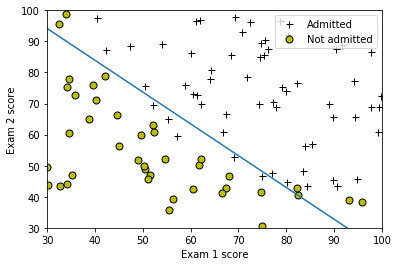

In [9]:
%matplotlib inline
X = data.iloc[:,[0,1]]
theta = res.x
# [TypeError: can't multiply sequence by non-int of type 'numpy.float64'](https://blog.csdn.net/qq_43149373/article/details/89790153)
# np.array(list)
def plotDecisionBoundary(theta, X, y):
    plotData(X, y)
    # plt.legend(['Admitted', 'Not admitted'],loc='upper right')
    plt.legend(['Admitted', 'Not admitted'],loc=1)
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    if(X.shape[1] <= 3):
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = [min(X.iloc[:,1])-2, max(X.iloc[:,1])+2]
        # Calculate the decision boundary line
        plot_y = np.array(-1/theta[2])*(np.array(theta[1])*plot_x + theta[0])
        plt.plot(plot_x,plot_y)
        plt.axis([30,100,30,100])
    else:
        print("Please complete me!")
    return
plotDecisionBoundary(theta,X,y)
print('Program paused. Press enter to continue.')

## ============== Part 4: Predict and Accuracies ==============
  After learning the parameters, you'll like to use it to predict the outcomes
  on unseen data. In this part, you will use the logistic regression model
  to predict the probability that a student with score 45 on exam 1 and 
  score 85 on exam 2 will be admitted.

  Furthermore, you will compute the training and test set accuracies of 
  our model.

  Your task is to complete the code in predict.m

  Predict probability for a student with score 45 on exam 1 
  and score 85 on exam 2 

In [11]:
X = np.column_stack((np.ones(m),data.iloc[:,[0,1]]))
res = minimize(fun=costFunctionWrapper,x0=initial_theta.reshape(-1), \
    args=(X,y),method='TNC', jac=gradFunctionWrapper)
theta  = res.x
prob = sigmoid(np.array([1,45,85]).dot(theta))
print('For a student with scores 45 and 85, we predict an admission ',
         'probability of {prob:.3f}\n'.format(prob=prob))
print('Expected value: 0.775 +/- 0.002\n\n')

For a student with scores 45 and 85, we predict an admission  probability of 0.776

Expected value: 0.775 +/- 0.002




In [14]:
# np.set_printoptions(suppress=True)
# np.array(sigmoid(X.dot(theta))).reshape(-1,1)
def predict(theta,X):
    m = X.shape[0] # Number of training examples
    p = np.zeros((m,1))
    # threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)
    prob = np.array(sigmoid(X.dot(theta))).reshape(-1,1)
    p = prob
    p[p>=0.5]=True
    p[p<0.5]=False
    return p
# Compute accuracy on our training set
p = predict(theta, X)
y_ = np.array(y).reshape(-1,1)
Acc = (p==y_).mean()*100
print('Train Accuracy: {Acc:.1f}%'.format( Acc = Acc))
print('Expected accuracy (approx): 89.0')

Train Accuracy: 89.0%
Expected accuracy (approx): 89.0
